In [1]:
# ==============================================================================
# Cell 1: Install Dependencies & Clone Repository
# ==============================================================================
import os
import shutil

print("Step 1: Installing the latest libraries from source.")

# Install the latest version of diffusers directly from GitHub to ensure compatibility.
# This resolves the "source install required" error.
!pip install -q git+https://github.com/huggingface/diffusers.git
!pip install -q transformers accelerate bitsandbytes

# Clone the diffusers repository to get the training scripts.
# We check if it exists to avoid errors on re-runs.
if not os.path.exists('diffusers'):
    !git clone https://github.com/huggingface/diffusers.git
else:
    print("Directory 'diffusers' already exists. Skipping clone.")

print("-" * 60)


# ==============================================================================
# Cell 2: Hugging Face Login
# ==============================================================================
from huggingface_hub import notebook_login

print("Step 2: Please log in to your Hugging Face account (optional but recommended).")
# This will prompt you for your access token.
# notebook_login()
print("-" * 60)


# ==============================================================================
# Cell 3: Prepare Your Dataset (from Zip file)
# ==============================================================================
import zipfile
import io
from google.colab import files

print("Step 3: Preparing dataset directory from a zip file.")
concept_images_dir = "my-concept-images"

# Clean up the directory from previous runs to ensure a fresh start.
if os.path.exists(concept_images_dir):
    shutil.rmtree(concept_images_dir)
os.makedirs(concept_images_dir)
print(f"Clean directory '{concept_images_dir}' created.")

print("\nACTION REQUIRED: Please upload your Minnal Murali_images.zip file now.")

# --- This part is specific to Google Colab ---
uploaded = files.upload()

if uploaded:
    zip_file_name = next(iter(uploaded))
    print(f"\nUploaded '{zip_file_name}'. Unzipping now...")

    # Unzip the file into the target directory
    with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
        zip_ref.extractall(concept_images_dir)

    extracted_files = os.listdir(concept_images_dir)
    print(f"✅ Successfully extracted {len(extracted_files)} files to '{concept_images_dir}'.")
else:
    print("⚠️ No file uploaded. The training will fail without images.")
# --- End of Colab-specific section ---
print("-" * 60)


# ==============================================================================
# Cell 4: Set Training Parameters
# ==============================================================================
print("Step 4: Defining training configuration.")

model_id = "runwayml/stable-diffusion-v1-5"
output_dir = "stable-diffusion-v1-5-MinnalMurali"
unique_concept_token = "Minnal Murali"
class_prompt = "Minnal Murali"
prompt = f"a photo of a {unique_concept_token} {class_prompt}"

print(f"Training with images from: '{concept_images_dir}'")
print(f"Unique Token: '{unique_concept_token}'")
print(f"Training Prompt: '{prompt}'")
print(f"Output will be saved to: '{output_dir}'")
print("-" * 60)


# ==============================================================================
# Cell 5: Run the Training
# ==============================================================================
print("Step 5: Starting the fine-tuning process.")

# The path to the script now points to the cloned repository.
training_script_path = "diffusers/examples/dreambooth/train_dreambooth_lora.py"

training_command = f"""
accelerate launch {training_script_path} \\
  --pretrained_model_name_or_path="{model_id}" \\
  --instance_data_dir="{concept_images_dir}" \\
  --output_dir="{output_dir}" \\
  --instance_prompt="{prompt}" \\
  --resolution=512 \\
  --train_batch_size=1 \\
  --gradient_accumulation_steps=1 \\
  --checkpointing_steps=100 \\
  --learning_rate=1e-4 \\
  --lr_scheduler="constant" \\
  --lr_warmup_steps=0 \\
  --max_train_steps=500 \\
  --validation_prompt="A photo of a {unique_concept_token} {class_prompt} in the Australian outback" \\
  --validation_epochs=50 \\
  --seed="0"
"""

# Execute the training command.
get_ipython().system(training_command)

print("-" * 60)


# ==============================================================================
# Cell 6: Test Your Fine-Tuned Model
# ==============================================================================
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image



Step 1: Installing the latest libraries from source.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━

Saving iloveimg-resized.zip to iloveimg-resized.zip

Uploaded 'iloveimg-resized.zip'. Unzipping now...
✅ Successfully extracted 29 files to 'my-concept-images'.
------------------------------------------------------------
Step 4: Defining training configuration.
Training with images from: 'my-concept-images'
Unique Token: 'Minnal Murali'
Training Prompt: 'a photo of a Minnal Murali Minnal Murali'
Output will be saved to: 'stable-diffusion-v1-5-MinnalMurali'
------------------------------------------------------------
Step 5: Starting the fine-tuning process.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-08-18 05:59:15.425949: E external/local_xla/xla

Step 6: Loading fine-tuned model for inference...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


✅ LoRA weights loaded successfully.
Generating test image...


  0%|          | 0/30 [00:00<?, ?it/s]

✅ Image generated and saved as 'MM_image.png'


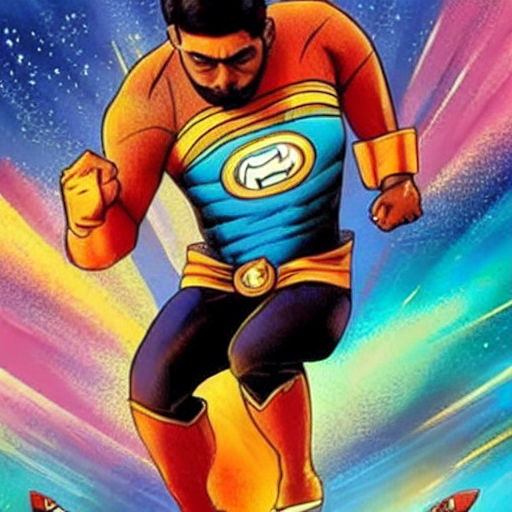

In [9]:
def test_inference():
    """
    Loads the fine-tuned model and generates a test image.
    """
    print("Step 6: Loading fine-tuned model for inference...")

    # Check if training was successful by seeing if the output directory exists
    if not os.path.exists(output_dir):
        print(f"❌ ERROR: Output directory '{output_dir}' not found.")
        print("This means the training in the previous step likely failed.")
        return

    # Load the base model
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.to("cuda")

    # Load the fine-tuned LoRA weights
    try:
        pipe.load_lora_weights(output_dir)
        print("✅ LoRA weights loaded successfully.")
    except Exception as e:
        print(f"❌ Could not load LoRA weights from '{output_dir}'.")
        print(f"Error: {e}")
        return

    print("Generating test image...")
    test_prompt = "Minnal Murali super hero landing"
    image = pipe(test_prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

    # Save and display the image
    image_path = "MM_image.png"
    image.save(image_path)
    print(f"✅ Image generated and saved as '{image_path}'")

    try:
        from google.colab.patches import cv2_imshow
        import cv2
        img = cv2.imread(image_path)
        cv2_imshow(img)
    except ImportError:
        print("Could not display image. Please view it in the file browser.")

# Run the inference test
test_inference()


In [10]:
# ==============================================================================
# Cell 7: Save and Upload Model to Hugging Face Hub
# ==============================================================================
from huggingface_hub import HfApi, create_repo
from google.colab import userdata # Use this for secure token handling
import os

print("Step 7: Uploading your fine-tuned model to the Hugging Face Hub.")

# --- 1. Configuration: Set your details here ---
# ACTION REQUIRED: Your Hugging Face username.
hf_username = "nikhiljose7"

# ACTION REQUIRED: The name for your new model repository on the Hub.
repo_name = "lora-sdv1-5-minnal-murali"

# This should be the same as the output directory from the training step.
local_model_dir = "stable-diffusion-v1-5-MinnalMurali"

# --- 2. Get Your Hugging Face Token ---
# It's best practice to use Colab's "Secrets" feature for your token.
# Go to the "Key" icon on the left sidebar and add a new secret named 'HF_TOKEN'.
try:
    HF_TOKEN = userdata.get('HF_TOKEN')
    if HF_TOKEN is None:
        raise ValueError("HF_TOKEN not found in Colab secrets.")
except Exception as e:
    print("❌ Could not find Hugging Face token.")
    print("Please go to the 'Secrets' tab (key icon on the left) and add your WRITE token with the name 'HF_TOKEN'.")
    # Stop execution if token is not found
    raise e

# --- 3. Create and Upload ---
repo_id = f"{hf_username}/{repo_name}"

print(f"Preparing to upload to: {repo_id}")

# Create the repository on the Hugging Face Hub
try:
    create_repo(
        repo_id=repo_id,
        token=HF_TOKEN,
        exist_ok=True, # Don't error if the repo already exists
        repo_type="model"
    )
    print(f"✅ Repository '{repo_id}' created or already exists.")
except Exception as e:
    print(f"❌ Error creating repository: {e}")
    raise e

# Instantiate the Hub API client
api = HfApi(token=HF_TOKEN)

# Upload the contents of your output directory
try:
    api.upload_folder(
        folder_path=local_model_dir,
        repo_id=repo_id,
        repo_type="model"
    )
    repo_url = f"https://huggingface.co/{repo_id}"
    print(f"✅ Successfully uploaded model files to: {repo_url}")
except Exception as e:
    print(f"❌ Error uploading files: {e}")
    raise e

Step 7: Uploading your fine-tuned model to the Hugging Face Hub.
Preparing to upload to: nikhiljose7/lora-sdv1-5-minnal-murali
✅ Repository 'nikhiljose7/lora-sdv1-5-minnal-murali' created or already exists.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...Murali/checkpoint-100/scheduler.bin: 100%|##########| 1.00kB / 1.00kB            

  ...Murali/checkpoint-300/scheduler.bin: 100%|##########| 1.00kB / 1.00kB            

  ...Murali/checkpoint-400/scheduler.bin: 100%|##########| 1.00kB / 1.00kB            

  ...Murali/checkpoint-400/optimizer.bin:   1%|          | 34.6kB / 6.59MB            

  ...Murali/checkpoint-200/scheduler.bin: 100%|##########| 1.00kB / 1.00kB            

  ...Murali/checkpoint-200/optimizer.bin:   1%|          | 34.6kB / 6.59MB            

  ...Murali/checkpoint-500/scheduler.bin: 100%|##########| 1.00kB / 1.00kB            

  ...Murali/checkpoint-100/optimizer.bin:   1%|          | 34.6kB / 6.59MB            

  ...Murali/checkpoint-300/optimizer.bin:   1%|          | 34.6kB / 6.59MB            

  ...Murali/checkpoint-500/optimizer.bin:   1%|1         | 98.2kB / 6.59MB            

✅ Successfully uploaded model files to: https://huggingface.co/nikhiljose7/lora-sdv1-5-minnal-murali
